### pass model parameters to optim - opt.step() does the parameter updatation step; opt.zero_grad() resets

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0) #torch seed for random

#### data(blob)

In [3]:
# data

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)

XX_train, XX_val, Y_train, Y_val = train_test_split(data, labels, 
                                                  stratify=labels, random_state=0)
print(XX_train.shape, XX_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


#### data as torch tensors

In [4]:
XX_train, Y_train, XX_val, Y_val = map(torch.tensor, (XX_train, Y_train, XX_val, Y_val)) 

# map the function to all and return all. - instead of calling on each one by one.

print(XX_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [5]:
XX_train = XX_train.float()
Y_train = Y_train.long()  # as its an index.

##### Accuracy

In [6]:
def accuracy(YY_hat, yy):
    pp = torch.argmax(YY_hat, dim=1) #prediction = max probability
    return (pp == yy).float().mean()


# .float() convert to float.
# pred==y -> bool of correct preds.

In [7]:
import torch.nn as nn

In [8]:
class ModelClass(nn.Module):
    def __init__(self):
        
        super().__init__()
        torch.manual_seed(0)

        self.lin1 = nn.Linear(2, 2)
        # automatically internally have weights,biases.
        # above- 2x2 weights, 2x1 bias
        # they will be wrapped in parameters.. also.
        self.lin2 = nn.Linear(2, 4)

    def forward(self, XX):
        # instead of writing the matmul line - using linear.
        AA1 = self.lin1(XX)
        HH1 = AA1.sigmoid()
        AA2 = self.lin2(HH1)
        HH2 = AA2.exp() / AA2.exp().sum(-1).unsqueeze(-1)
        return HH2

### optim   

parameters passed to optimizer  
opt.step()  
iterate through them and do:  
    param += param.grad*lr

In [9]:
from torch import optim

# NOT nn

In [10]:
import torch.nn.functional as F

#### fit function using optim.

**model_obj.parameters() passed to optim**   
**"parameters" passed**

In [11]:
def fit(epochs=1000, learning_rate=1):
    loss_arr = []
    acc_arr = []

    opt = optim.SGD(model_obj.parameters(), lr=learning_rate)
    # parameters passed to optimizer
    # can implement multiple optimizers with this 
    # specified as additional args - like momentum, nestrov, adam, ...

    for epoch in range(epochs):
        
        # forward
        YY_hat = model_obj(XX_train)
        
        # loss
        loss = F.cross_entropy(YY_hat, Y_train)
        
        # logging loss, accuracy
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(YY_hat, Y_train))
        
        # compute gradient
        loss.backward()

        # instead of iterating through parameters and updating manually
        opt.step()  # BP step. updating all parameters.
        opt.zero_grad()  # reseting gradients of all parameters
    
    # plotting logged loss, accuracy
    plt.plot(loss_arr, "r-")
    plt.plot(acc_arr, "b-")
    plt.show()
    print("Loss before training: ", loss_arr[0])
    print("Loss after training: ", loss_arr[-1])

parameters are there in model object.   
model_obj.parameters() are passed to optim - along with other arguments relevent for optimization.  
so it has the parameters   
opt.step => **do the corresponding parameter updation step to the parameters** (corresponding to the optimization method) (with no_grad)

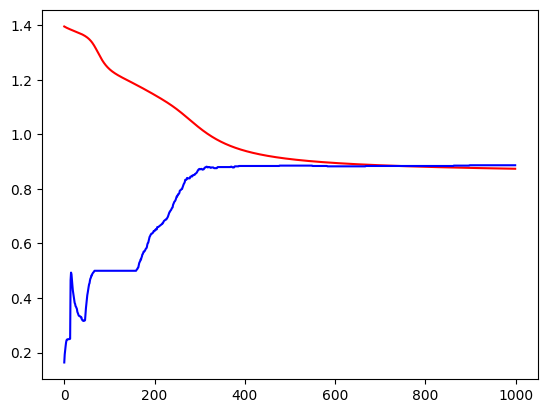

Loss before training:  1.3951597213745117
Loss after training:  0.8738412857055664


In [12]:
model_obj = ModelClass()
fit()